In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn import linear_model
%matplotlib inline

In [2]:
df_cdiag = pd.read_csv("cancer_diagnostics_small.csv", header=None)

In [3]:
df_cdiag.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
df_cdiag.columns = ['Sample_code_number','clump_thickness', 'cell_size', 'cell_shape', 'marginal_adhesion', 
             'Single_epithelial_cell_size','bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 
             'mitoses', 'class']

In [5]:
df_cdiag.head()

,Sample_code_number,clump_thickness,cell_size,cell_shape,marginal_adhesion,Single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [6]:
df_cdiag['bare_nuclei'] = pd.to_numeric(df_cdiag.bare_nuclei,errors='coerce')

In [7]:
df_cdiag = df_cdiag.dropna()

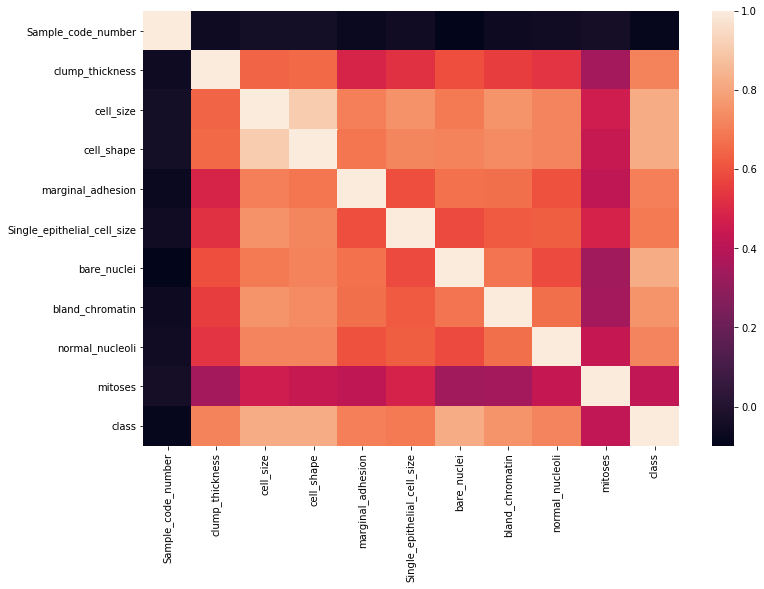

In [8]:
corr = df_cdiag.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.show()

In [9]:
X = df_cdiag.drop(['Sample_code_number','class'],1)
Y = df_cdiag['class']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, train_size=0.5)

### SVC

In [11]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

accuracy = svc.score(X_test,y_test)
cross_val = cross_val_score(svc, X_test, y_test, cv=5)
y_pred = svc.predict(X_test)
f1 = f1_score(y_test,y_pred,average='weighted')

In [13]:
print('Accuracy score: %.4f' % accuracy)
print('F1 score: %.4f' % f1)
print('Cross-validation score: ')
cross_val

Accuracy score: 0.9591
F1 score: 0.9595
Cross-validation score: 


array([0.94202899, 0.95652174, 0.95652174, 0.97058824, 0.95522388])

### Random Forest

In [14]:
from sklearn import ensemble

rfc = ensemble.RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [15]:
accuracy_rfc = rfc.score(X_test,y_test)
cross_val_rfc = cross_val_score(rfc, X_test, y_test, cv=5)
y_pred_rfc = rfc.predict(X_test)
f1_rfc = f1_score(y_test,y_pred_rfc,average='weighted')

In [16]:
print('Accuracy score: %.4f' % accuracy_rfc)
print('F1 score: %.4f' % f1_rfc)
print('Cross-validation score: ')
cross_val_rfc

Accuracy score: 0.9503
F1 score: 0.9499
Cross-validation score: 


array([0.94202899, 0.89855072, 0.95652174, 0.95588235, 0.95522388])

SVC outperforms Random Forest for this dataset.